## 2-13. 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. 데이터 가져오기

In [2]:
df = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### 2. datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [3]:
# 현재 datetime 컬럼은 object 타입
df[["datetime"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datetime  10886 non-null  object
dtypes: object(1)
memory usage: 85.2+ KB


In [4]:
df["datetime"] = pd.to_datetime(df["datetime"])

In [5]:
# 현재 datetime 컬럼은 datetime 타입으로 변경
df[["datetime"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  10886 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 85.2 KB


In [6]:
df["yyyy"]=pd.to_datetime(df["datetime"]).dt.year
df["mm"]=pd.to_datetime(df["datetime"]).dt.month
df["dd"]=pd.to_datetime(df["datetime"]).dt.day
df["hour"]=pd.to_datetime(df["datetime"]).dt.hour
df["min"]=pd.to_datetime(df["datetime"]).dt.minute
df["sec"]=pd.to_datetime(df["datetime"]).dt.second

In [7]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,yyyy,mm,dd,hour,min,sec
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


### 3. year, month, day, hour, minute, second 데이터 개수 시각화하기

- 단순히 countplot으로 개수를 세는 것은 무의미할 것 같아서 target과 각각의 컬럼을 비교하는 방법으로 시각화 하였다. 

In [8]:
import seaborn as sns

__countplot 시각화__

<AxesSubplot:xlabel='sec', ylabel='count'>

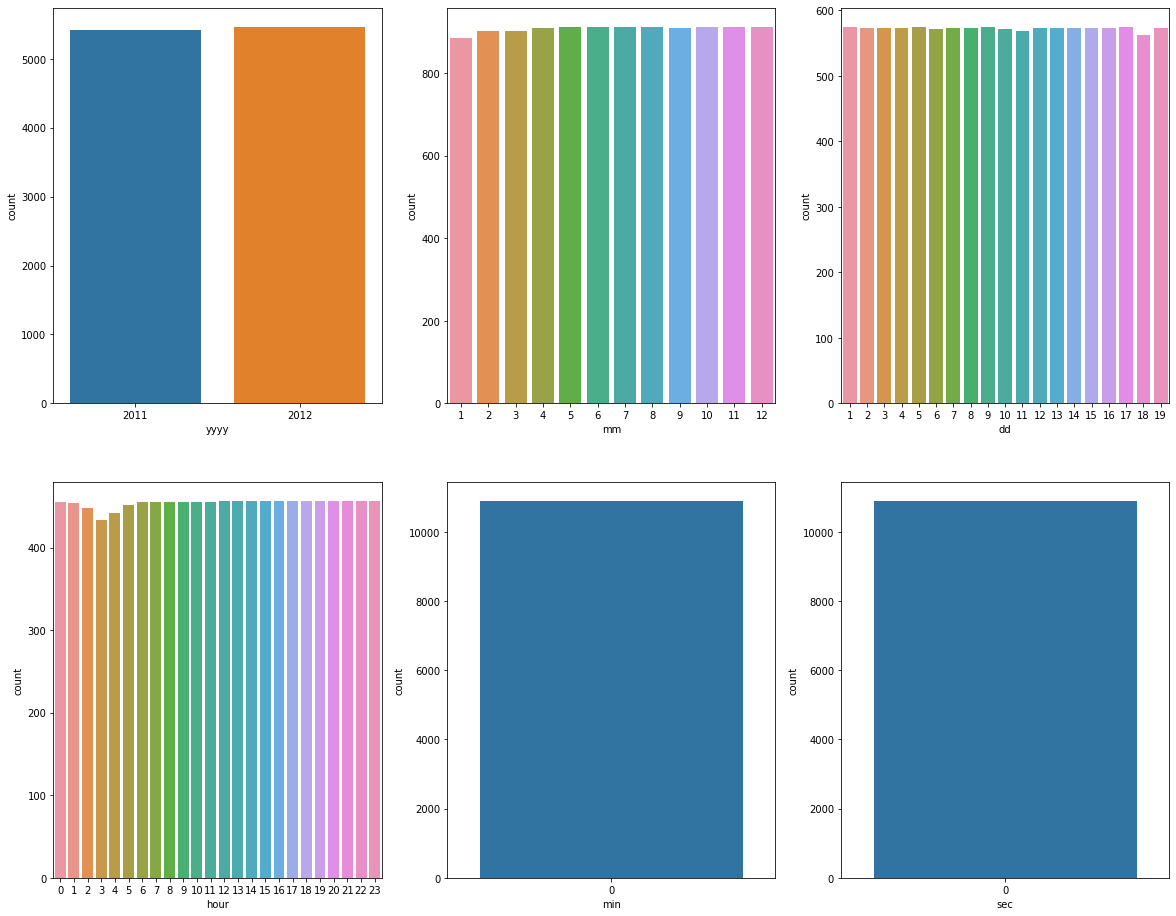

In [9]:
p = plt.figure(figsize = (20,16))

plt.subplot(2,3,1)
sns.countplot(data=df, x="yyyy",)

plt.subplot(2,3,2)
sns.countplot(data=df, x="mm")

plt.subplot(2,3,3)
sns.countplot(data=df, x="dd")

plt.subplot(2,3,4)
sns.countplot(data=df, x="hour")

plt.subplot(2,3,5)
sns.countplot(data=df, x="min",)

plt.subplot(2,3,6)
sns.countplot(data=df, x="sec",)

__주요 피쳐들과 타겟과의 관계 시각화__
- countplot을 활용한 시각화에서 "분"과 "초"는 데이터가 0뿐이라 의미가 없다.
- 또한 countplot으로는 년, 월, 일, 시 데이터에서 유의미한 정보를 얻지 못했다. 
- 이에 다양한 시각화를 통해 타겟과 피쳐간의 관계를 파악해 보기로 했다.

<AxesSubplot:xlabel='datetime', ylabel='count'>

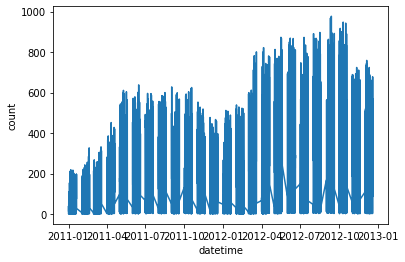

In [10]:
sns.lineplot(data=df, x = "datetime", y = "count")

<AxesSubplot:xlabel='yyyy', ylabel='count'>

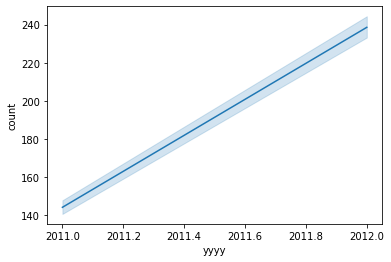

In [11]:
sns.lineplot(data=df, x = "yyyy", y = "count")

<AxesSubplot:xlabel='mm', ylabel='count'>

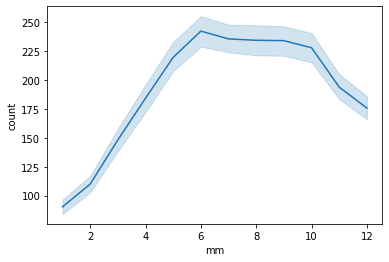

In [12]:
sns.lineplot(data=df, x = "mm", y = "count")

<AxesSubplot:xlabel='dd', ylabel='count'>

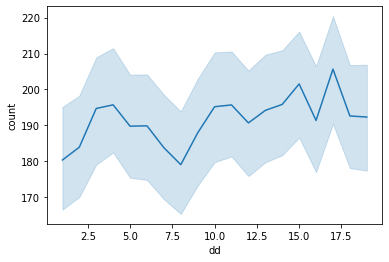

In [13]:
sns.lineplot(data=df, x = "dd", y = "count")

<AxesSubplot:xlabel='hour', ylabel='count'>

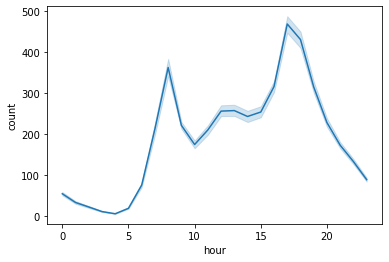

In [14]:
sns.lineplot(data=df, x = "hour", y = "count")

<AxesSubplot:xlabel='weather', ylabel='count'>

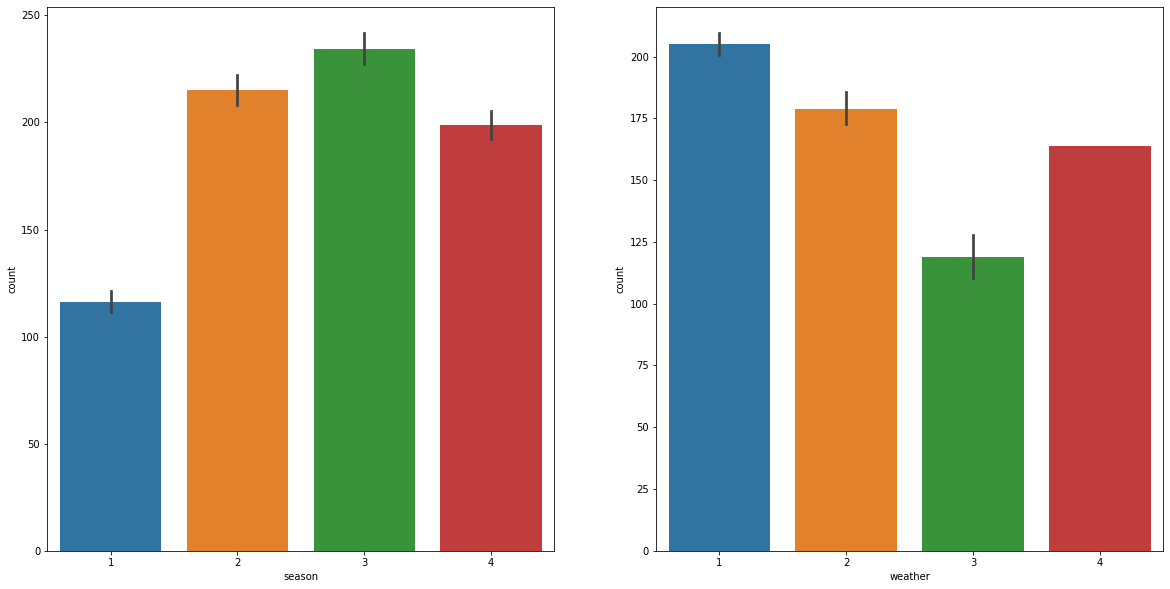

In [15]:
p = plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.barplot(data=df, x = "season", y = "count")

plt.subplot(1,2,2)
sns.barplot(data=df, x = "weather", y = "count")

### 4. X, y 컬럼 선택 및 train/test 데이터 분리

In [16]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,yyyy,mm,dd,hour,min,sec
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


In [41]:
# 유의미한 컬럼만 추출
X = df[["season", "holiday", "workingday", "weather","temp", "atemp", "humidity", "windspeed", "yyyy", "mm", "hour"]].values

X

array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 2.011e+03, 1.000e+00,
        0.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.011e+03, 1.000e+00,
        1.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.011e+03, 1.000e+00,
        2.000e+00],
       ...,
       [4.000e+00, 0.000e+00, 1.000e+00, ..., 2.012e+03, 1.200e+01,
        2.100e+01],
       [4.000e+00, 0.000e+00, 1.000e+00, ..., 2.012e+03, 1.200e+01,
        2.200e+01],
       [4.000e+00, 0.000e+00, 1.000e+00, ..., 2.012e+03, 1.200e+01,
        2.300e+01]])

In [42]:
y = df["count"].values
y

array([ 16,  40,  32, ..., 168, 129,  88])

In [43]:
X.shape, y.shape

((10886, 11), (10886,))

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8708, 11), (2178, 11), (8708,), (2178,))

### 5. LinearRegression 모델 학습

In [47]:
# 모델 생성
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [48]:
# 모델 학습
model.fit(X_train, y_train)

LinearRegression()

### 6. 학습된 모델로  X_test에 대한 예측값 출력 및 손실함수값 계산

In [49]:
predictions = model.predict(X_test)
predictions

array([246.03920187,  47.27902342, 200.64737551, ..., 311.09130581,
        40.16305359, 242.48741015])

In [50]:
predictions.shape

(2178,)

In [51]:
predictions-y_test

array([ 119.03920187,   34.27902342,   37.64737551, ..., -197.90869419,
         35.16305359,    3.48741015])

In [52]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

19957.295306143493

### 7. x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화 하기

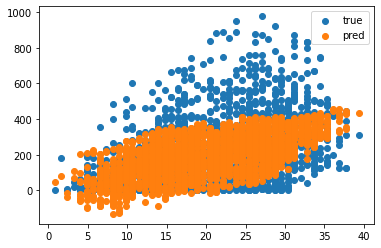

In [54]:
# x = temp
plt.scatter(X_test[:,4], y_test, label = "true")
plt.scatter(X_test[:,4], predictions, label = "pred")
plt.legend()  # 범례 표시하기
plt.show()

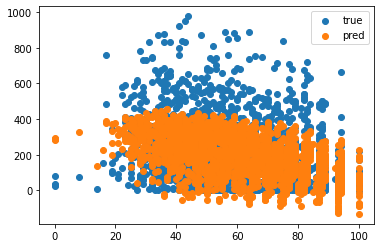

In [55]:
# x = humidity
plt.scatter(X_test[:,6], y_test, label = "true")
plt.scatter(X_test[:,6], predictions, label = "pred")
plt.legend()  # 범례 표시하기
plt.show()

# 회고
- 처음에 별생각 없이 casual, register 피쳐를 포함해서 모델을 학습시켰더니 너무 높은 정확도가 나와서 이상하다고 생각했었다. 
- 컬럼 설명을 자세히 읽어보니 casual과 register 피쳐는 count(타겟) 수치에 직접적인 영향을 미치는 컬럼으로서 예측에 포함해서는 안되는 피쳐였다. 
- 두 피쳐를 제거하고 다시 모델을 학습시켜보니 적절하게 예측된 결과가 나왔다. 
- 너무 직접적인 영향을 미치는 컬럼이 존재하는것도 모델 학습에 문제를 만들 수 있다는 사실을 생각해본적이 없었는데 앞으로 피쳐에 대한 특성을 정확히 파악하고 분석해야할 것 같다. 